In [1]:
import numpy as np 
import pandas as pd
import os
train_path = 'C:/Users/preet/Downloads/Final Project/backend/archive/data/train'
validation_path = 'C:/Users/preet/Downloads/Final Project/backend/archive/data/validation'

In [3]:
train_folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
print("Folders in the training dataset path:", train_folders)

validation_folders = [f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))]
print("Folders in the validation dataset path:", validation_folders)

Folders in the training dataset path: ['Acral_Lentiginous_Melanoma', 'blue_finger', 'clubbing', 'Healthy_Nail', 'Onychogryphosis', 'pitting']
Folders in the validation dataset path: ['Acral_Lentiginous_Melanoma', 'blue_finger', 'clubbing', 'Healthy_Nail', 'Onychogryphosis', 'pitting']


In [4]:
folders = train_folders+validation_folders 

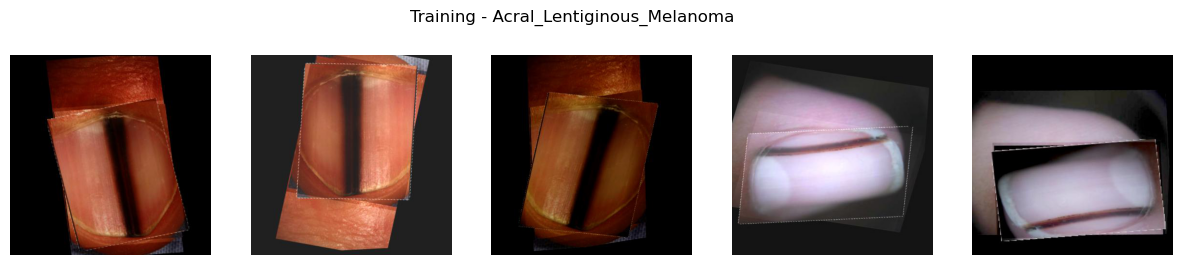

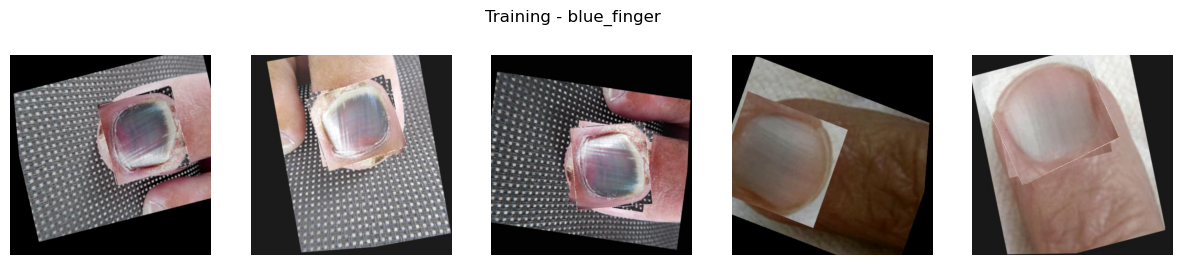

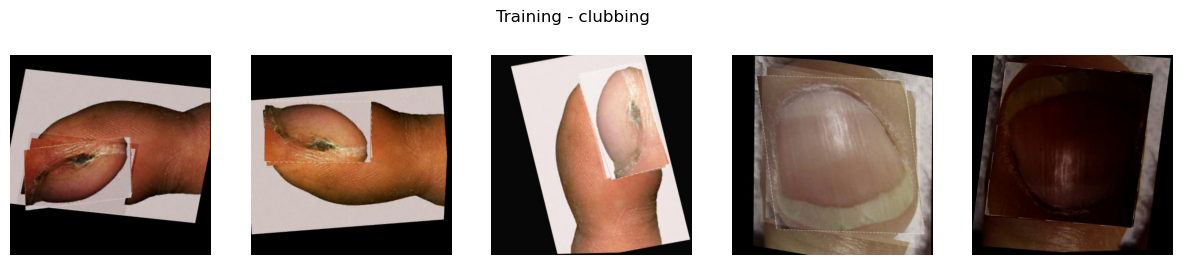

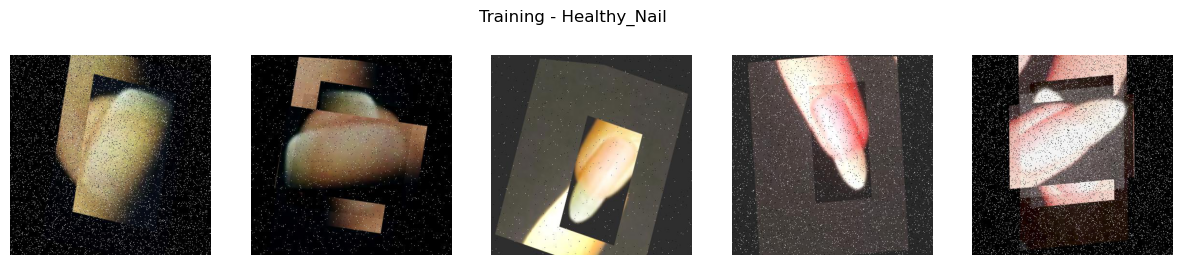

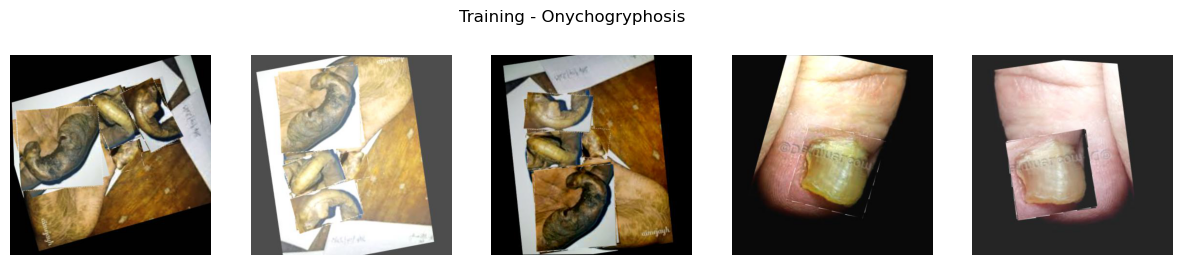

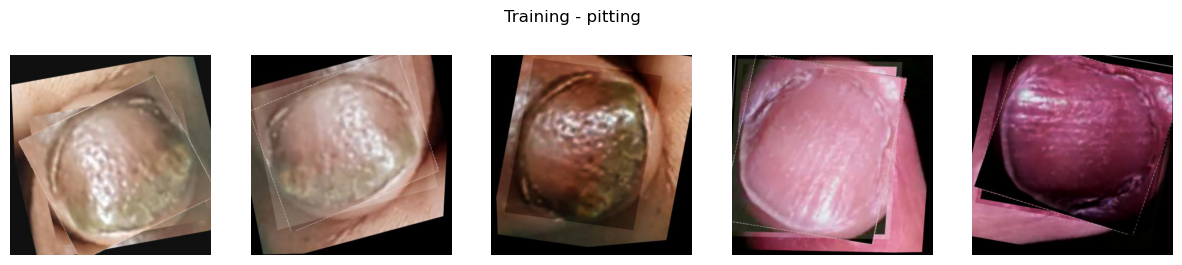

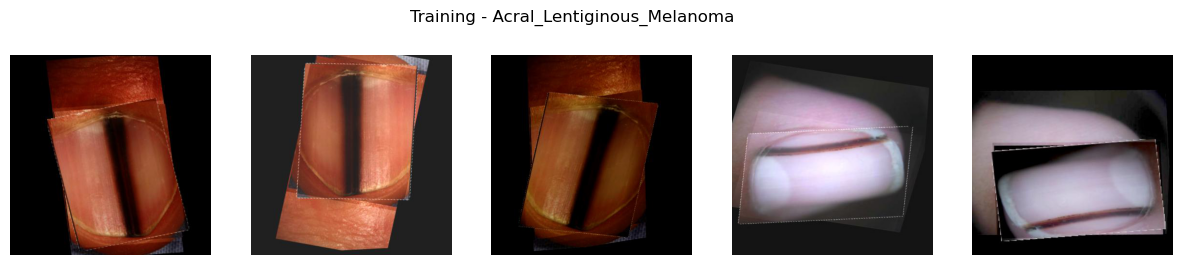

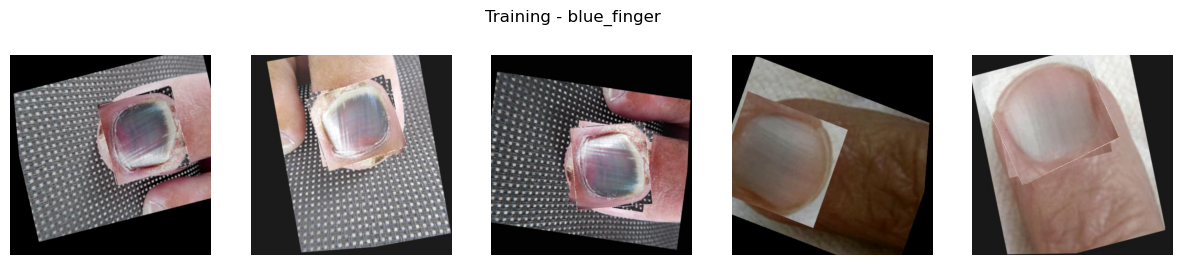

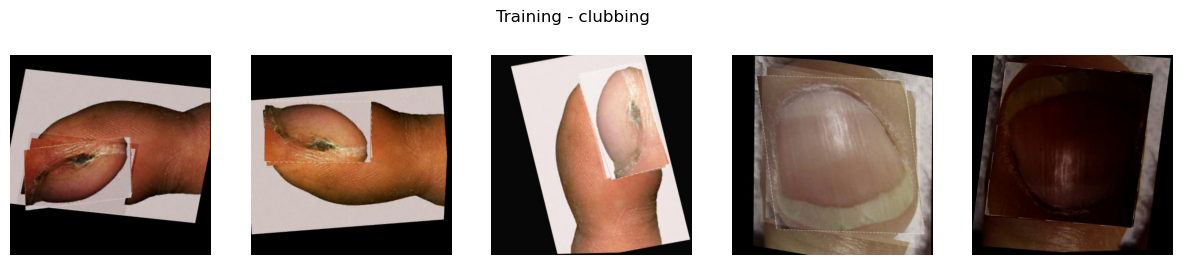

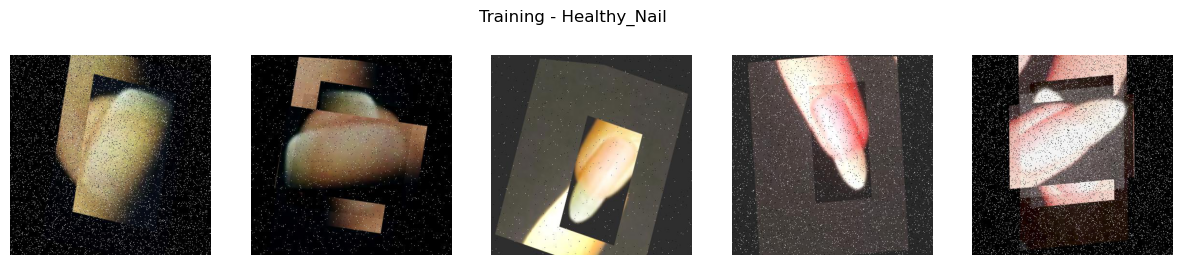

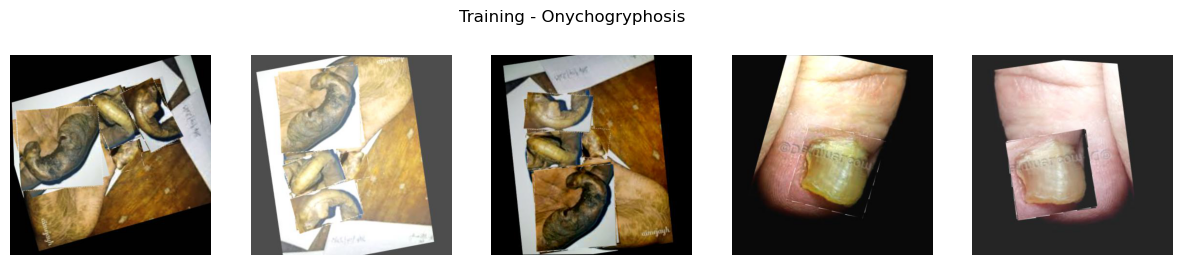

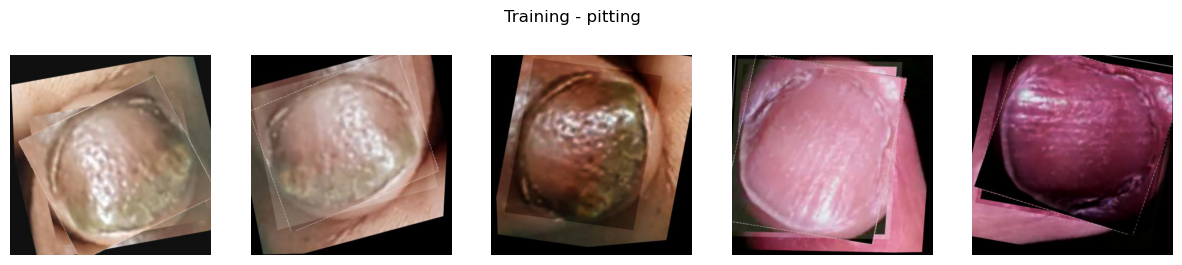

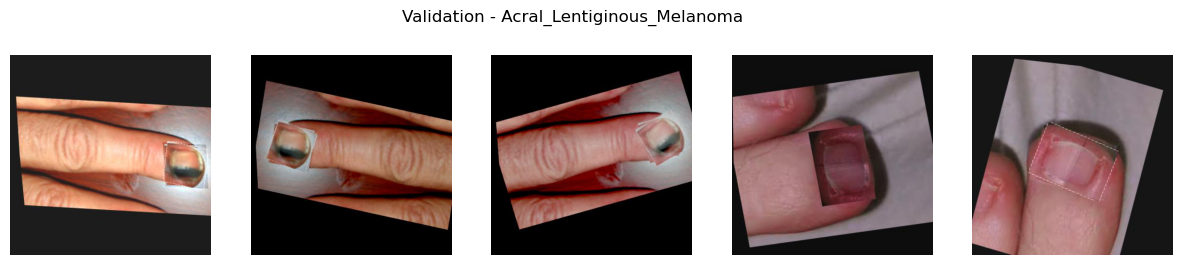

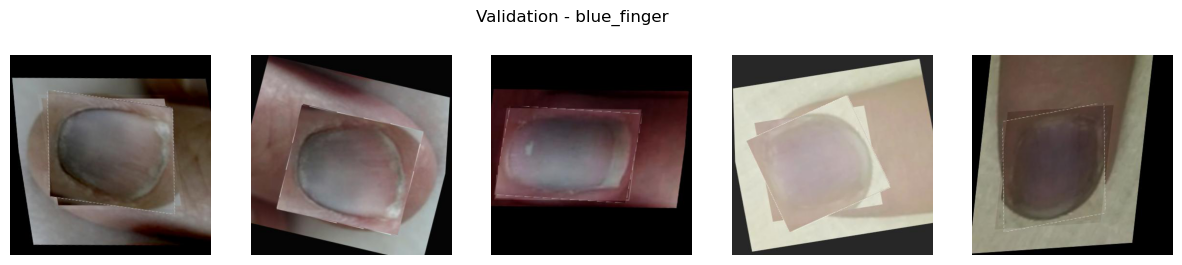

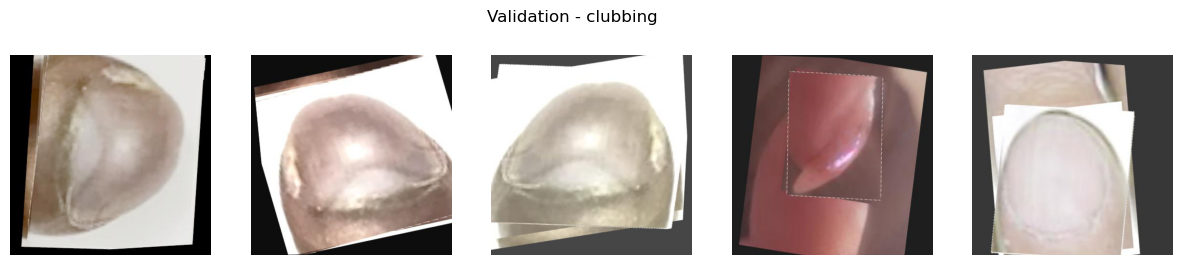

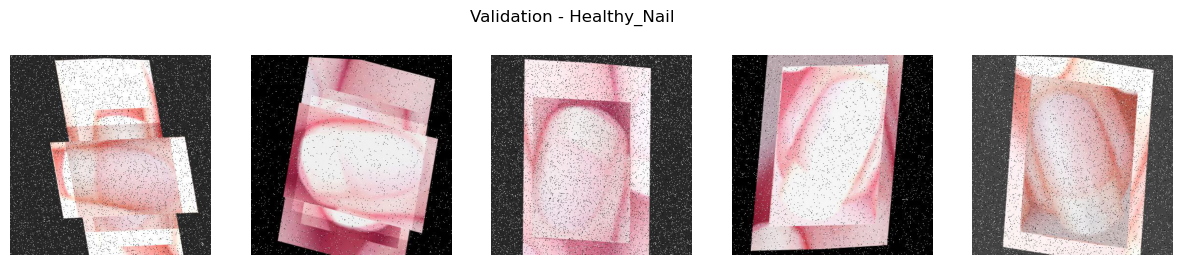

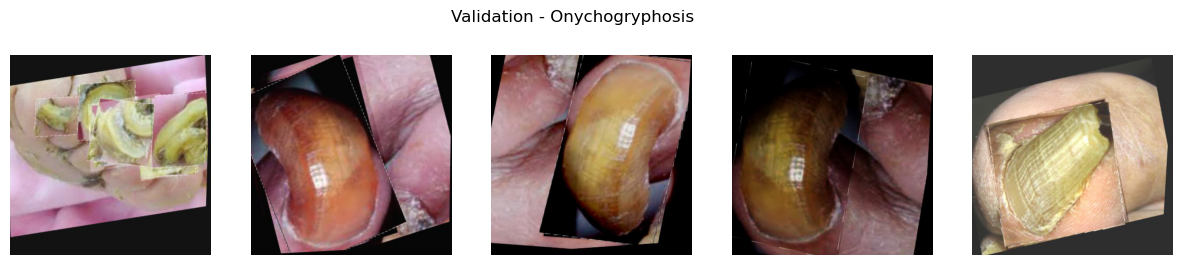

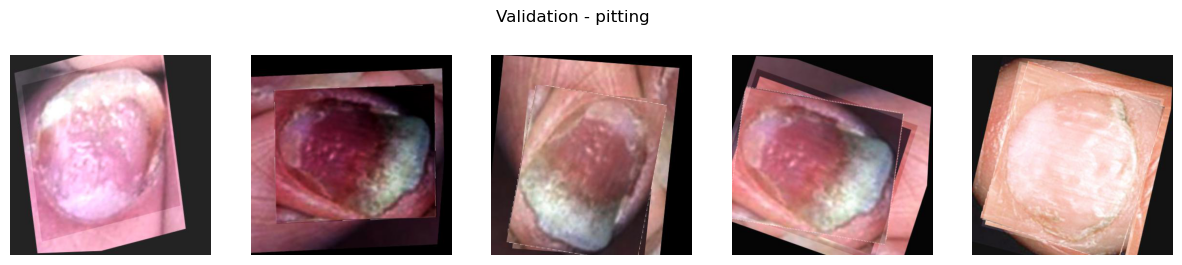

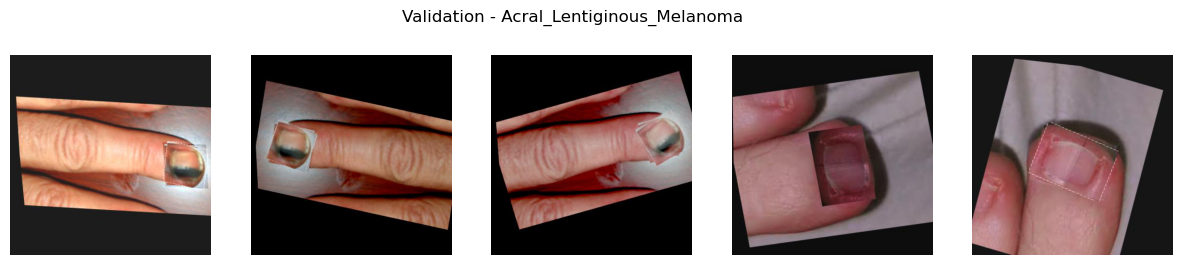

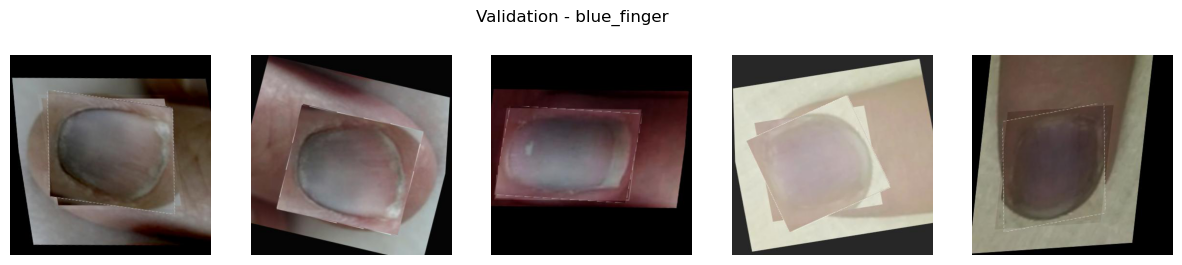

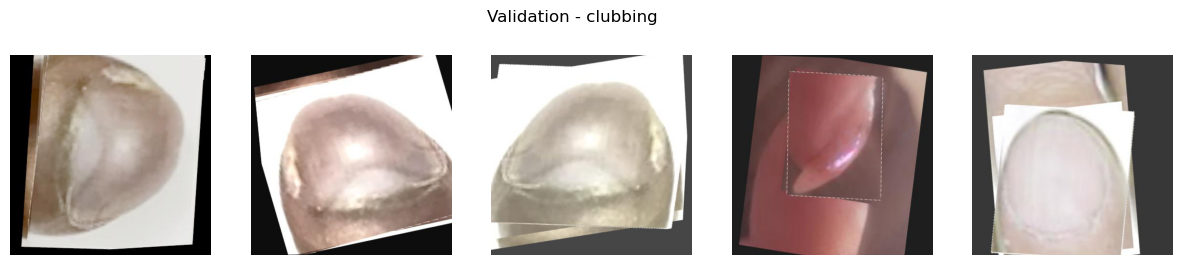

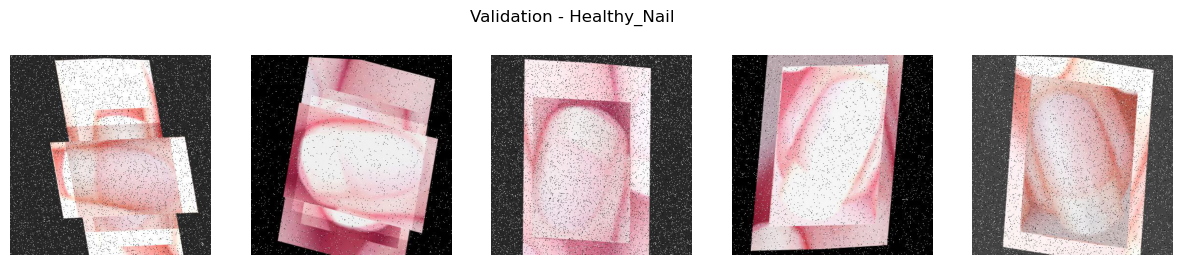

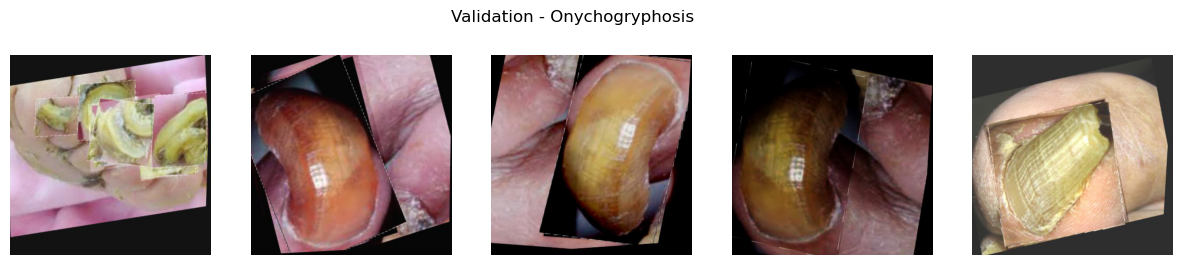

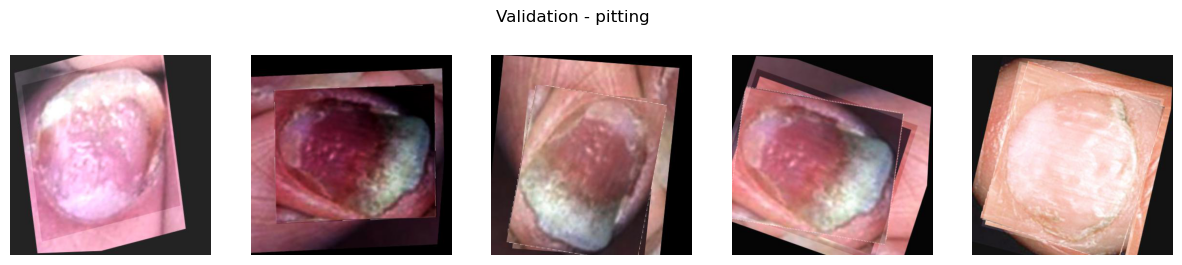

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
def display_images_from_folder(folder_path, title):
    """Display up to 5 images from a specified folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = image_files[:5]  

    plt.figure(figsize=(15, 3)) 
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    display_images_from_folder(folder_path, f'Training - {folder}')

for folder in folders:
    folder_path = os.path.join(validation_path, folder)
    display_images_from_folder(folder_path, f'Validation - {folder}')

In [6]:
def preprocess_image(image_path, size=(128, 128)):
    """Load, resize, and normalize an image."""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size)
    img = img / 255.0  
    return img

def save_image(image, save_path):
    """Save a preprocessed image."""
    image = (image * 255).astype(np.uint8)  
    img_pil = Image.fromarray(image)
    img_pil.save(save_path)

def preprocess_and_save_images(folder_path, save_dir, size=(128, 128)):
    """Preprocess and save images from a folder."""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path, size)
            save_path = os.path.join(save_dir, filename)
            save_image(preprocessed_img.numpy(), save_path)
preprocess_and_save_images(train_path, train_path)
preprocess_and_save_images(validation_path, validation_path)


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def create_image_dataset(directory, img_size=(128, 128), batch_size=32):
    """Create a TensorFlow dataset from a directory of images."""
    datagen = ImageDataGenerator(rescale=1.0/255) 
    
    dataset = datagen.flow_from_directory(
        directory,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',  
        shuffle=True
    )
    
    return dataset

train_dataset = create_image_dataset(train_path)
val_dataset = create_image_dataset(validation_path)

Found 3744 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


In [8]:
def create_model(input_shape, num_classes):
    """Create a CNN model for image classification."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model
input_shape = (128, 128, 3)  
num_classes = len(train_dataset.class_indices)
model = create_model(input_shape, num_classes)
model.save("C:/Users/preet/Downloads/Final Project/backend/model/disease_detection_model.h5")


c:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and will be used.")
else:
    print("No GPU found, using CPU.")

No GPU found, using CPU.


In [10]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  
    verbose=1
)

c:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 62s 516ms/step - accuracy: 0.2324 - loss: 1.7454 - val_accuracy: 0.3956 - val_loss: 1.3160
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 29s 248ms/step - accuracy: 0.3768 - loss: 1.4428 - val_accuracy: 0.4835 - val_loss: 1.2559
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step - accuracy: 0.4482 - loss: 1.3133 - val_accuracy: 0.5385 - val_loss: 1.1002
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 26s 218ms/step - accuracy: 0.4928 - loss: 1.2144 - val_accuracy: 0.5165 - val_loss: 1.1190
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 202ms/step - accuracy: 0.5254 - loss: 1.1303 - val_accuracy: 0.5934 - val_loss: 1.0248
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - accuracy: 0.5621 - loss: 1.0664 - val_accuracy: 0.6044 - val_loss: 0.9931
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 202ms/step - accuracy: 0.6008 - loss: 1.0076 - val_accuracy: 0.4945 - val_loss: 1.1979
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.6078 - loss: 0

In [11]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6257 - loss: 0.9358
Validation Loss: 0.9334113001823425
Validation Accuracy: 0.6263736486434937


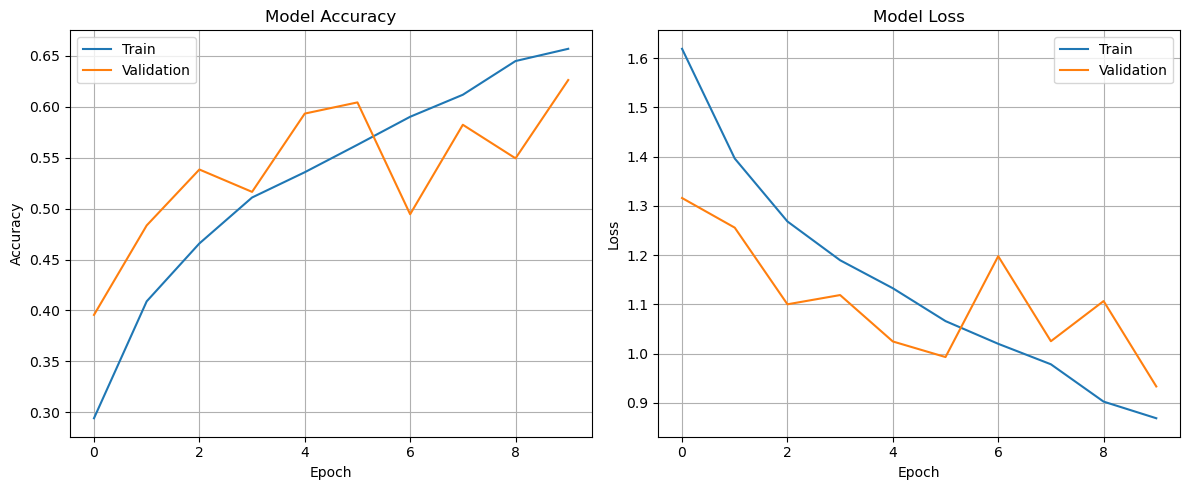

In [12]:
def plot_history(history):
    """Plot the training history."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_history(history)